### S24 -- Feature engineering 
  ##  1. Handling  missing values
 
   There are three primary mechanisms by which missing values occur in data, based on the work of statistician Donald Rubin. Understanding these mechanisms helps guide how to handle missing data in a statistically sound manner.

## a) Missing Completely at Random (MCAR)
Missing values are considered MCAR if their occurrence is entirely independent of any other data, including both the observed and unobserved values. In other words, the missing data is not related to any variables in the dataset.

Example: A survey respondent skips a question because they accidentally overlooked it, not because of the question itself or any other factors related to the person.

Implications: If data is missing completely at random, the missingness introduces no bias. You can safely discard the missing data or apply simple imputation methods, as the missing values are a random subset.

Handling:
Listwise deletion (dropping missing rows) is acceptable.
Simple imputation (e.g., mean, median) can be used.

##  b) Missing at Random (MAR)
MAR means the probability of a value being missing is related to other observed data but not to the missing value itself. In this case, the reason for the missingness can be explained by other variables in the dataset.

Example: In a medical study, patients might be less likely to report their income if they have a lower educational level. Here, the missingness in income depends on the education level, which is observed.

Implications: If data is MAR, the missingness can be explained and potentially modeled using other observed variables. Imputation techniques that use the observed data (e.g., regression, multiple imputation) can be applied.

Handling:
More sophisticated imputation methods, such as:

Regression imputation.

Multiple imputation

Model-based approaches (e.g., Maximum Likelihood Estimation).

## c) Missing Not at Random (MNAR)
MNAR occurs when the missingness is related to the value of the variable that is missing, and this relationship cannot be fully explained by the other observed variables. The missing data is systematic and depends on unobserved factors.

Example: Patients with higher levels of depression may be less likely to report their depression score. In this case, the missingness is related to the value of the missing variable itself (depression score).

Implications: MNAR is the most challenging to deal with because the cause of the missingness is directly tied to the missing values. Ignoring or improperly handling this type of missingness can introduce serious bias.

Handling:
Modeling the missing data mechanism explicitly (e.g., using joint modeling).

Sensitivity analysis to understand how different assumptions about the missing data affect results.

In some cases, domain knowledge may be required to fill in the missing data accurately.

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
### check missing values 
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
### check missing values and total their no 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
### delete the rows or data pt to handle missing values 
df.shape

(891, 15)

In [9]:
df.dropna().shape ## here we are loosing a large amount of data

(182, 15)

In [12]:
## column wise deletion 
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation missing values 

1. mean value imputation 


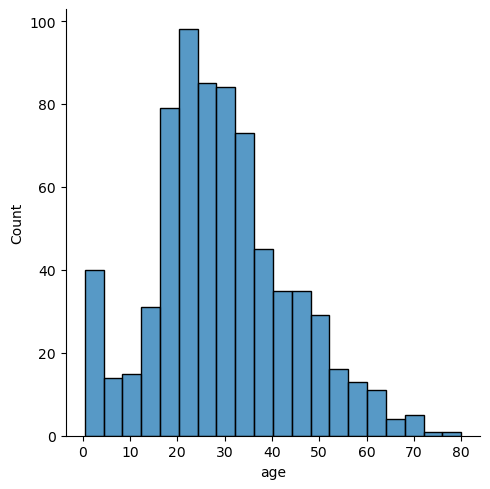

In [13]:
sns.displot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

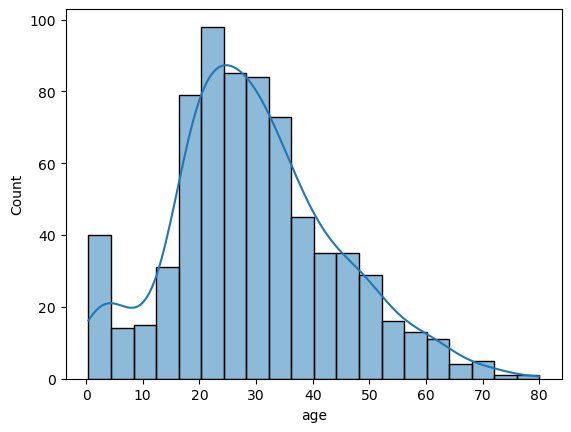

In [16]:
sns.histplot(df['age'],kde=True)

In [17]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [18]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [19]:
## mean imputation works well when we have normally distributed data 

2. Median value imputation -- if we have outlires in the data set 

In [20]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [22]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


3. mode imputation techniques -- generally used for categorical values 

In [24]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


df['embarked'].unique()

In [26]:
mode_value =df[df['embarked'].notna()]['embarked'].mode()[0]

In [27]:
df['embarked_mode']= df['embarked'].fillna(mode_value)

In [30]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [31]:
df['embarked_mode'].isnull().sum()

0

## 2. Handling imbalanced dataset

a) Up-sampling (Oversampling):
Up-sampling (or oversampling) is the process of increasing the number of samples in the minority class so that it matches the size of the majority class. This is typically done by duplicating existing minority samples or generating synthetic ones.

In [2]:
import numpy as np 
import pandas as pd 

##set the random seed for reproductivity 
np.random.seed(123)

## create a dataframe with two classes 
n_samples= 1000 
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [36]:
(n_class_0,n_class_1)

(900, 100)

In [3]:
## creating my dataframe with imbalanced data set 
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size= n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size= n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size= n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size= n_class_1),
    'target':[1]*n_class_1
})
    


In [4]:
df =pd.concat([class_0,class_1]).reset_index(drop=True)

In [5]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [6]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [8]:
## upsampling 
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [9]:
from sklearn.utils import resample 
df_minority_updated = resample(df_minority,replace= True, ##sample with replacement
                               n_samples = len(df_majority),
                               random_state = 42
                              )

In [10]:
df_minority_updated.shape

(900, 3)

In [11]:
df_minority_updated.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [54]:
df_upsampled = pd.concat([df_majority,df_minority_updated])

In [55]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

b)  Down-sampling (Undersampling):
Down-sampling (or undersampling) is the process of reducing the number of samples in the majority class to match the minority class. This is done by randomly removing samples from the majority class.

In [13]:
import numpy as np 
import pandas as pd 

##set the random seed for reproductivity 
np.random.seed(123)

## create a dataframe with two classes 
n_samples= 1000 
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

## creating my dataframe with imbalanced data set 
class_0 = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size= n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size= n_class_0),
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size= n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size= n_class_1),
    'target':[1]*n_class_1
})
  

In [14]:
 df =pd.concat([class_0,class_1]).reset_index(drop=True) 

In [15]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [16]:
## downsampling 
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [17]:
from sklearn.utils import resample 
df_majority_downsampled = resample(df_majority,replace= False, ##sample with replacement
                               n_samples = len(df_minority),
                               random_state = 42
                              )

In [18]:
df_majority_downsampled.shape

(100, 3)

In [19]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [21]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## 3. handling imbalanced dataset using smote

Handling imbalanced datasets is crucial in machine learning, as it can lead to biased model performance. SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address class imbalance by generating synthetic examples for the minority class. Here’s how SMOTE works and how to apply it:

What is SMOTE?
SMOTE generates synthetic data points by:

Selecting a minority class instance (randomly).

Finding its nearest neighbors (typically using Euclidean distance).

Creating synthetic samples by interpolating between the selected instance and its neighbors.

In [22]:
from sklearn.datasets import make_classification 

In [23]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [11]:
import pandas as pd 
df1= pd.DataFrame(X,columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [14]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

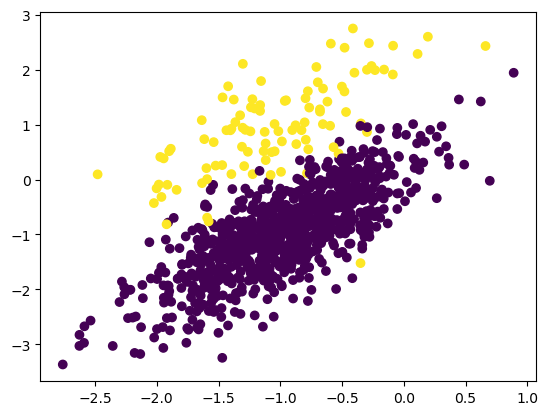

In [16]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [17]:
pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE


In [20]:
oversample = SMOTE()
X,y =oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [21]:
X.shape


(1800, 2)

In [22]:
y.shape

(1800,)

In [24]:
len(y[y==0])

900

In [25]:
len(y[y==1])

900

In [26]:
df1= pd.DataFrame(X,columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

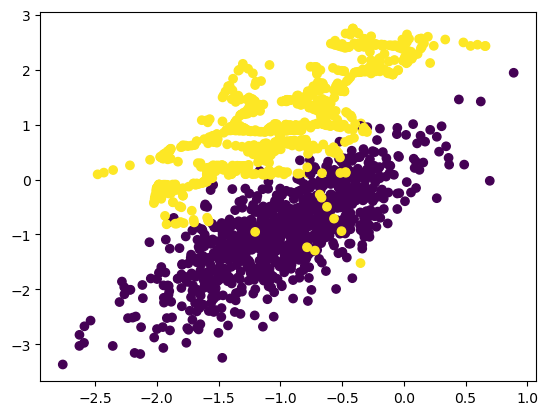

In [27]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

### 5 no.summary 

In [28]:
import numpy as np 

In [33]:
lst_marks=[45,32,56,75,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [35]:
minimum,Q1,median,Q3,maximum


(32.0, 54.5, 70.5, 88.5, 99.0)

In [36]:
IQR= Q3-Q1
IQR

34.0

In [39]:
lower_fence = Q1-1.5*(IQR)
higher_fence =Q3+1.5*(IQR)

In [41]:
lower_fence 


3.5

In [42]:
higher_fence 

139.5

In [ ]:
lst_marks=[45,32,56,75,89,90,87,67,54,45,98,99,67,74]

<Axes: >

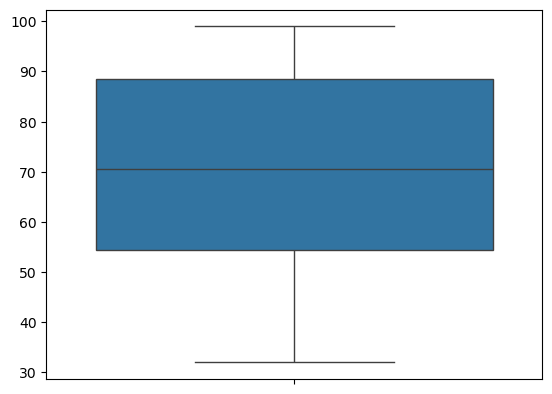

In [44]:
import seaborn as sns
sns.boxplot(lst_marks)

In [47]:
lst_marks=[-100,-200,45,32,56,75,89,90,87,67,54,45,98,99,67,150,170]

<Axes: >

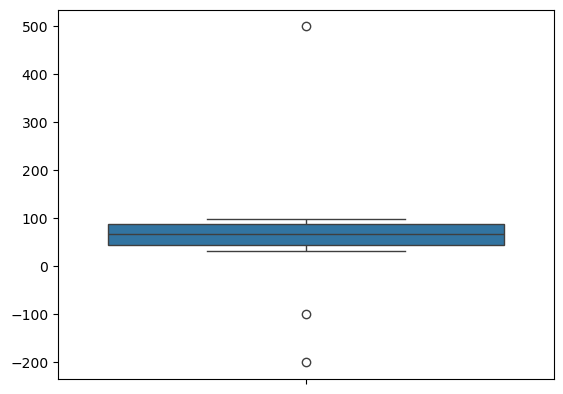

In [46]:
sns.boxplot(lst_marks)

## Data encoding 
Data encoding is the process of converting categorical variables (non-numerical data) into a numerical format that machine learning models can process.

1. nominal / ohe encoding 


Nominal Encoding is used to transform nominal (categorical) data, which has no inherent order, into numerical form. The most common and widely used technique for nominal encoding is One-Hot Encoding (OHE). Here's a detailed explanation and guide to implementing OHE.

What is One-Hot Encoding?
One-Hot Encoding converts each unique category in a nominal (categorical) variable into a new binary (0/1) column. Each category gets its own column, where a "1" indicates the presence of that category in a particular observation, and "0" indicates its absence.

In [49]:
'''Example
Consider a column with a nominal categorical variable for "Color":

Index	Color
1	    Red
2	    Blue
3	    Green
4	    Red
5	    Blue

After One-Hot Encoding:


Index	Red	  Blue	Green
1	     1	    0	   0
2	     0	    1	   0
3	     0	    0	   1
4	     1	    0	   0
5	     0	    1	   0 '''

'Example\nConsider a column with a nominal categorical variable for "Color":\n\nIndex\tColor\n1\t    Red\n2\t    Blue\n3\t    Green\n4\t    Red\n5\t    Blue\n\nAfter One-Hot Encoding:\n\n\nIndex\tRed\t  Blue\tGreen\n1\t     1\t    0\t   0\n2\t     0\t    1\t   0\n3\t     0\t    0\t   1\n4\t     1\t    0\t   0\n5\t     0\t    1\t   0 '

In [26]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

In [27]:


# Original data
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}
df = pd.DataFrame(data)

# Initialize OneHotEncoder
encoder = OneHotEncoder()  # Use sparse=True for sparse matrix output

# Fit and transform the data
ohe_data = encoder.fit_transform(df[['Color']]).toarray()




In [28]:
data

{'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']}

In [ ]:
df_

In [62]:
encoder_df = pd.DataFrame(ohe_data ,columns=encoder.get_feature_names_out())

In [63]:
encoder_df

,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [70]:
## for new data
encoder.transform([['Blue']]).toarray()

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [74]:
pd.concat([df,encoder_df],axis=1)

,Color,Color_Blue,Color_Green,Color_Red
0,Red,0.0,0.0,1.0
1,Blue,1.0,0.0,0.0
2,Green,0.0,1.0,0.0
3,Red,0.0,0.0,1.0
4,Blue,1.0,0.0,0.0


## Label encoding
is a technique used in machine learning and data preprocessing to convert categorical data into numerical format.

Label encoding assigns a unique numerical value to each category in a categorical feature. It is typically used for nominal data (categories without any inherent order).

The encoding does not imply any ordinal relationship between the categories.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Sample data
data = ["Red", "Blue", "Green", "Blue", "Red"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_data = label_encoder.fit_transform(data)

print(encoded_data)  # Output: [0 1 2 1 0]

[2 0 1 0 2]


## Ordinal encoding 
is used for ordinal data, where categories have a natural order or ranking. It assigns numerical values to categories while preserving their order.

Categories are assigned integers based on their order (e.g., "Low" → 0, "Medium" → 1, "High" → 2).

In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample data
data = pd.DataFrame({"Size": ["Small", "Medium", "Large", "Medium", "Small"]})

# Define the order of categories
categories = [["Small", "Medium", "Large"]]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the data
encoded_data = ordinal_encoder.fit_transform(data)

print(encoded_data)  # Output: [[0.], [1.], [2.], [1.], [0.]]

[[0.]
 [1.]
 [2.]
 [1.]
 [0.]]


# Target Guided Ordinal Encoding 
is a technique used to encode categorical variables based on the relationship between the categorical feature and the target variable. It is particularly useful for ordinal data or when you want to capture the influence of a categorical feature on the target variable in a meaningful way.

This method assigns numerical values to categories based on the mean (or other statistics) of the target variable for each category. It is a form of supervised encoding because it uses the target variable to guide the encoding process.

# How Target Guided Ordinal Encoding Works

## Group by Category:
For each category in the categorical feature, calculate the mean (or median, etc.) of the target variable.

## Assign Ranks: 
Assign ranks or numerical values to the categories based on the calculated means. Categories with higher target means get higher ranks.

## Replace Categories: 
Replace the original categorical values with the assigned ranks.

In [36]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    "City": ["New York", "Boston", "Boston", "Chicago", "New York", "Chicago"],
    "Income": [100, 80, 90, 70, 110, 60]
})

# Calculate mean income for each city
mean_income = data.groupby("City")["Income"].mean().to_dict()

# Map categories to their mean income
data["Encoded_City"] = data["City"].map(mean_income)

print(data)

       City  Income  Encoded_City
0  New York     100         105.0
1    Boston      80          85.0
2    Boston      90          85.0
3   Chicago      70          65.0
4  New York     110         105.0
5   Chicago      60          65.0
